## Prediksi Gagal Jantung Menggunakan Metode Naive Bayes Classifier (NBC)

In [1]:
# Mengimport iobrary yang akan digunakan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, plot_roc_curve

### Review dan Analisis Dataset

In [2]:
# Memanggil file csv, file berada dalam satu folder yang sama dengan file ipynb
df = pd.read_csv('data_jantung.csv')

In [3]:
# Menampilkan 5 baris awal data pada dataframe
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# Menampilkan unique value pada target, mengetahui kelas target
df.target.unique()

array([0, 1], dtype=int64)

In [5]:
# Menampilkan deskripsi statistik data
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
# Menampilkan informasi detail struktur DataFrame
# Dapat mengetahui tipe data (object, integer, float)
# Dapat mengetahui apakah ada data 'null'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
# Memastikan kembali apakah ada data yang hilang/missing values
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [8]:
# Menampilkan korelasi antar kolom terhadap target
print(df.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
max heart rate         0.413278
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
cholesterol            0.198366
resting bp s           0.121415
resting ecg            0.073059
Name: target, dtype: float64


In [9]:
# Menampilkan korelasi antar fitur
df.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


### Visualisasi Data

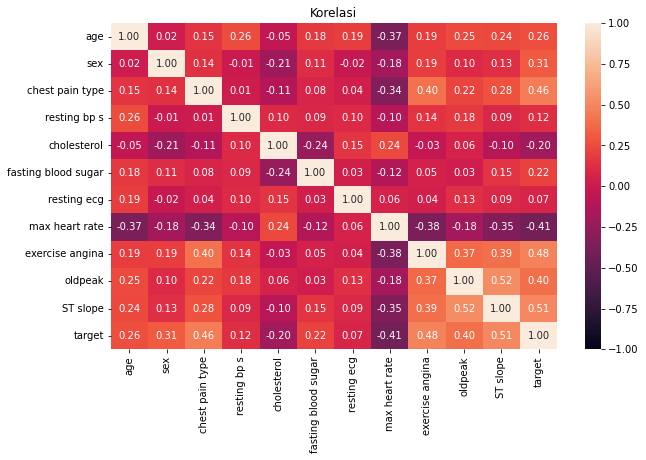

In [10]:
# Menampilkan korelasi dengan menggunakan Heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1,annot=True,fmt=".2f").set_title("Korelasi")
plt.show()

Text(0, 0.5, 'Count')

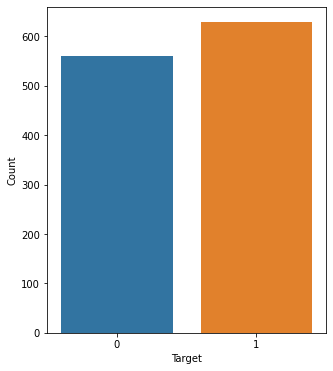

In [11]:
# Menampilkan grafik fitur 'target' menggunakan Barchart
plt.figure(figsize=(5, 6))
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')

In [12]:
# Melihat unique value fitur 'sex'
df["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

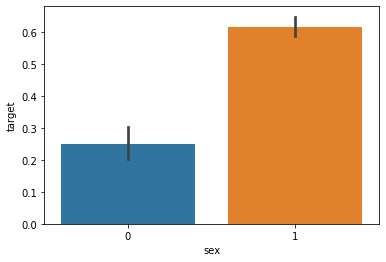

In [13]:
# Menampilkan grafik fitur 'sex' menggunakan Barchart
sns.barplot(df["sex"], df['target'])

In [14]:
# Melihat unique value fitur 'chest pain type'
df["chest pain type"].unique()

array([2, 3, 4, 1], dtype=int64)

<AxesSubplot:xlabel='chest pain type', ylabel='target'>

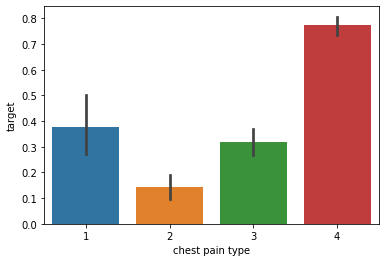

In [15]:
# Menampilkan grafik fitur 'chest pain type' menggunakan Barchart
sns.barplot(df["chest pain type"], df['target'])

In [16]:
# Melihat unique value fitur 'fasting blood sugar'
df["fasting blood sugar"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='fasting blood sugar', ylabel='target'>

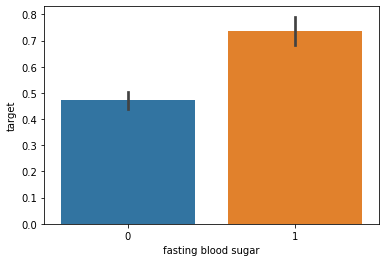

In [17]:
# Menampilkan grafik fitur 'fasting blood sugar' menggunakan Barchart
sns.barplot(df["fasting blood sugar"], df['target'])

In [18]:
# Melihat unique value fitur 'resting ecg'
df["resting ecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='resting ecg', ylabel='target'>

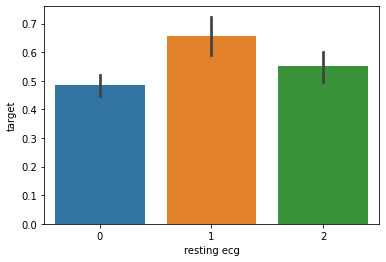

In [19]:
# Menampilkan grafik fitur 'resting ecg' menggunakan Barchart
sns.barplot(df["resting ecg"], df['target'])

In [20]:
# Melihat unique value fitur 'exercise angina'
df["exercise angina"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exercise angina', ylabel='target'>

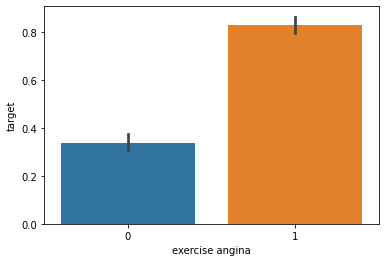

In [21]:
# Menampilkan grafik fitur 'exercise angina' menggunakan Barchart
sns.barplot(df["exercise angina"], df['target'])

In [22]:
# Melihat unique value fitur 'ST slope'
df["ST slope"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='ST slope', ylabel='target'>

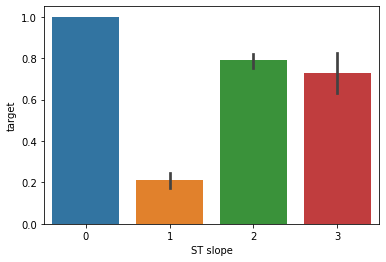

In [23]:
# Menampilkan grafik fitur 'ST slope' menggunakan Barchart
sns.barplot(df["ST slope"], df['target'])

### Importansi Fitur

In [24]:
# Menggunakan algoritma Random Forest untuk mencari features importance
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Menetapkan variabel baru untuk data yang akan digunakan
ftrs = df.drop(columns=['target']) 
trgt = df.target

In [26]:
# Memisahkan data test dan data latih
ftrs_train, ftrs_test, trgt_train, trgt_test = train_test_split(ftrs, trgt, test_size=0.3, random_state=1)

<AxesSubplot:>

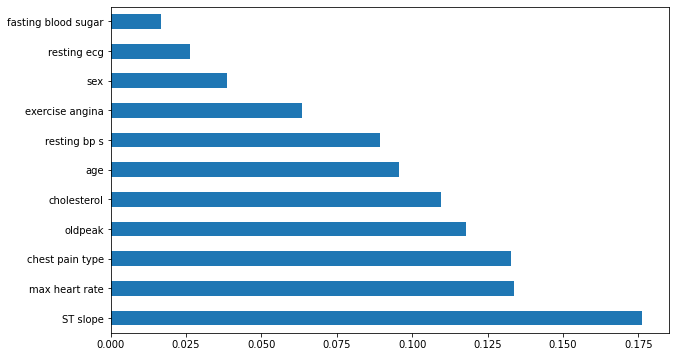

In [27]:
# Mengatur Ukuran Grafik
plt.figure(figsize=(10, 6))

# Memakai Random Forest Classifier untuk penilaian nilai importance
model = RandomForestClassifier()
model.fit(ftrs_train, trgt_train)

# Menghitung nilai importance setiap features
feat_importances = pd.Series(model.feature_importances_, index=ftrs_train.columns)

# Menampilkan hasil nilai importances dalam bentuk bar plot horizontal
feat_importances.nlargest(12).plot(kind='barh')

### Pembangunan Model

In [28]:
# Menetapkan variabel baru untuk data yang akan digunakan
X = df.drop(columns=['target']) 
y = df.target

In [29]:
# Memisahkan data test dan data latih
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [30]:
# Melihat data latih yang digunakan
display(X_train)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
641,54,0,2,132,288,1,2,159,1,0.0,1
1019,29,1,2,130,204,0,2,202,0,0.0,1
642,48,0,3,130,275,0,0,139,0,0.2,1
957,65,0,3,155,269,0,0,148,0,0.8,1
625,60,1,4,140,293,0,2,170,0,1.2,2
...,...,...,...,...,...,...,...,...,...,...,...
1033,57,1,4,165,289,1,2,124,0,1.0,2
763,52,1,4,112,230,0,0,160,0,0.0,1
835,54,1,3,120,258,0,2,147,0,0.4,2
559,58,1,3,137,232,0,1,124,1,1.4,2


In [31]:
# Melihat data test yang digunakan
display(X_test)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
825,64,1,3,125,309,0,0,131,1,1.8,2
443,51,1,4,128,0,1,1,125,1,1.2,2
506,55,1,3,136,245,1,1,131,1,1.2,2
1152,42,1,4,136,315,0,0,125,1,1.8,2
364,56,1,4,120,0,0,1,148,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
564,55,1,4,135,204,1,1,126,1,1.1,2
54,52,0,4,130,180,0,0,140,1,1.5,2
621,74,0,2,120,269,0,2,121,1,0.2,1
529,49,1,3,131,142,0,0,127,1,1.5,2


In [32]:
# Pemodelan Naive Bayes Classifier (NBC)
nb_clf = GaussianNB()

# Memerintahkan model untuk mempelajari data latih
nb_clf.fit(X_train, y_train)

# Mengaplikasikan model terhadap data test
nb_pred = nb_clf.predict(X_test)

# Menghitung nilai akurasi
nb_acc = accuracy_score(y_test, nb_pred)

In [33]:
# Membuat dan menampilkan Confusion Matrix dari hasil prediksi oleh NBC
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, 
                          figsize=(5,5), text_size=15, 
                          norm=False, savefig=False): 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Oranges)
  fig.colorbar(cax)
    
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    
  if savefig:
    fig.savefig("confusion_matrix.png")

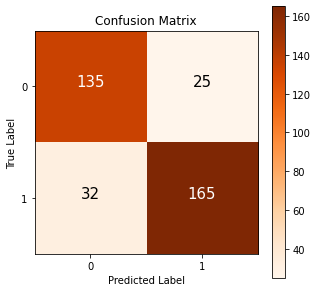

In [34]:
# Menampilkan hasil Confusion Matrix yang dibuat
make_confusion_matrix(y_true = y_test, y_pred = nb_pred)

In [35]:
# Menampilkan Classification Report
print(metrics.classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       160
           1       0.87      0.84      0.85       197

    accuracy                           0.84       357
   macro avg       0.84      0.84      0.84       357
weighted avg       0.84      0.84      0.84       357



In [36]:
# Menampilkan nilai akurasi dalam bentuk persen
print("The accuracy score achieved using NBC is {:.2f}%".format(100*nb_acc))

The accuracy score achieved using NBC is 84.03%
